In [1]:
# import numpy as np
# import pandas as pd
# import statsmodels
# from statsmodels.tsa.stattools import coint
# from scipy import stats
# import datetime
# import matplotlib.pyplot as plt

# long_idea="USB"
# short_idea="KEY"

# ymd='2016-11-25'

# def zscore(series):
#     return (series - series.mean()) / np.std(series)

# symbol_list = [long_idea,short_idea]

# securities_panel = get_pricing(symbol_list, fields=['price'], start_date='2015-01-01', end_date=ymd)
# securities_panel.minor_axis = map(lambda x: x.symbol, securities_panel.minor_axis)

# df_long_idea=securities_panel.loc['price'][long_idea]
# df_short_idea=securities_panel.loc['price'][short_idea]

# score, pvalue, _ = coint(df_long_idea, df_short_idea)

# print("pvalue:"+str("{0:.2f}%".format(pvalue)))

# if pvalue < .05:
#     print("This p value is statistically significant with a 95% confidence interval.")
# else:
#     print("This p value is not statistically significant with a 95% confidence interval.  Perhaps try another time period.")

# model = pd.ols(y=df_long_idea,x=df_short_idea)
# df_hedge_ratio = model.beta['x']

# df_hedge_ratio

# diff_series = df_long_idea - df_short_idea*df_hedge_ratio

# zscore(diff_series).plot()
# plt.axhline(zscore(diff_series).mean(), color='black')
# plt.axhline(1.0, color='red', linestyle='--')
# plt.axhline(-1.0, color='green', linestyle='--')
# dlen=len(diff_series)
# a=zscore(diff_series)
# x=a[dlen-1]

# print("zscore:"+str("{0:.2f}%".format(x)))

# if x > 1:
#     print("Recommendation: invert this pair idea")
# elif x < -1: 
#     print("Recommendation: good pair idea")


In [2]:

from objects import *
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 100

In [3]:
pair_list = ['COF','DFS']

In [4]:
from statsmodels.tsa.stattools import coint
from scipy import stats

In [5]:
portfolio = Portfolio(pair_list,log=True)

In [6]:
portfolio.spy

ticker,index,SPY
0,2012-01-03,103.596207
1,2012-01-04,103.758682
2,2012-01-05,104.034943
3,2012-01-06,103.766830
4,2012-01-09,104.018669
...,...,...
2797,2023-02-14,412.640015
2798,2023-02-15,413.980011
2799,2023-02-16,408.279999
2800,2023-02-17,407.260010


In [7]:
portfolio.df_wide

ticker,index,COF,DFS
0,2012-01-03,36.302303,19.592527
1,2012-01-04,36.924629,19.673445
2,2012-01-05,37.488857,19.843395
3,2012-01-06,37.472271,19.665356
4,2012-01-09,38.376720,19.746275
...,...,...,...
2797,2023-02-14,115.349998,115.349998
2798,2023-02-15,114.629997,115.250000
2799,2023-02-16,111.550003,111.629997
2800,2023-02-17,111.169998,111.180000


In [8]:
portfolio.dataset

ticker,SPY,COF,DFS,price_date
0,4.640501,3.591881,2.975148,2012-01-03
1,4.642068,3.608879,2.979270,2012-01-04
2,4.644727,3.624044,2.987871,2012-01-05
3,4.642146,3.623601,2.978858,2012-01-06
4,4.644570,3.647451,2.982965,2012-01-09
...,...,...,...,...
2797,6.022576,4.747971,4.747971,2023-02-14
2798,6.025818,4.741710,4.747104,2023-02-15
2799,6.011953,4.714473,4.715190,2023-02-16
2800,6.009452,4.711061,4.711151,2023-02-17


In [9]:
p = portfolio.pairs[0]

In [10]:
p.cointegrates

True

In [11]:
p.x

0       3.591881
1       3.608879
2       3.624044
3       3.623601
4       3.647451
          ...   
2797    4.747971
2798    4.741710
2799    4.714473
2800    4.711061
2801    4.683519
Name: COF, Length: 2802, dtype: float64

In [12]:
p.y

0       2.975148
1       2.979270
2       2.987871
3       2.978858
4       2.982965
          ...   
2797    4.747971
2798    4.747104
2799    4.715190
2800    4.711151
2801    4.692540
Name: DFS, Length: 2802, dtype: float64

In [13]:
p.beta

1.0638885370893794

In [14]:
p.pvalue

0.035278281650272456

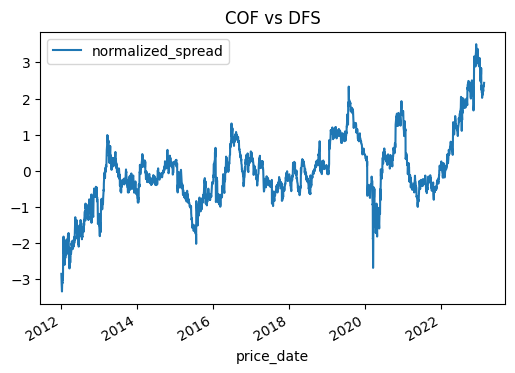

In [15]:
p.plot_spread()